In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
%matplotlib inline
import pandas as pd
import pystan

# Bayes Statistik

- Parameter als Zufallsvariable 
    - Wahrscheinlichkeitsverteilung
    - Wissen
- Meßdaten verbessern das Wissen
- Satz von Bayes

$$p(\theta|D) = \frac{p(D\theta)p(\theta)}{p(D)}$$

- Posterior Verteilung
    - Mathematisch geschlossen, wenn *conjugate priors* passend
    - Gitter-Näherung, so lange Modelldimensionen klein genug
    - *Markov Chain Monte Carlo*
        - Stan, Pystan

# Hierarchische Modelle

- Mehrere Modellparameter
- Gemeinsame Grundlage
- Gegenseitige Abhängigkeit
    - Kopplung zwischen Hierarchie-Ebenen
    - Kopplung innerhalb Hierarchie-Ebene

#### Beispiel *Heilungserfolg im Krankenhaus*


- Krankenhäuser: Grundvoraussetzung $\omega_j$
    * Ausstattung, Motivation der Belegschaft, Ausbildungsniveau, ...

- Ärzte-Teams: Erfolgsrate $\theta_i$
    * Erfahrung, individuelle Ausbildung, eingespielt, ...

- Patient: wird geheilt $y_j$ mit Wahrscheinlichkeit $\theta_i$


#### Beispiel *Psychophysischer Effekt*

- Versuchsbedingung (z.B. Stimuluskontrast) $\omega$ beeinflußt Leistung der Versuchspersonen
- Versuchspersonen haben Antwortwahrscheinlichkeit $\theta_i$
- Antwortverhalten $y_{ij}$ bei mehrfacher Wiederholung

Interesse liegt nicht auf den individuellen Leistungen $\theta$, sondern auf der Beeinflussung $\omega$

#### Beispiel *Münzprägeanstalt*

- Prägeanstalt produziert Münzen mit (Maschinen-) Parameter $\omega$
- Jede Münze hat eine Wahrscheinlichkeit $\theta_i$ für *Kopf*, abhängig von Prägemethode ($\omega$) 
- Bernoulli-Zufallsexperiment mit Wahrscheinlichkeit $\; p_{\text{Kopf}}=\theta_i$

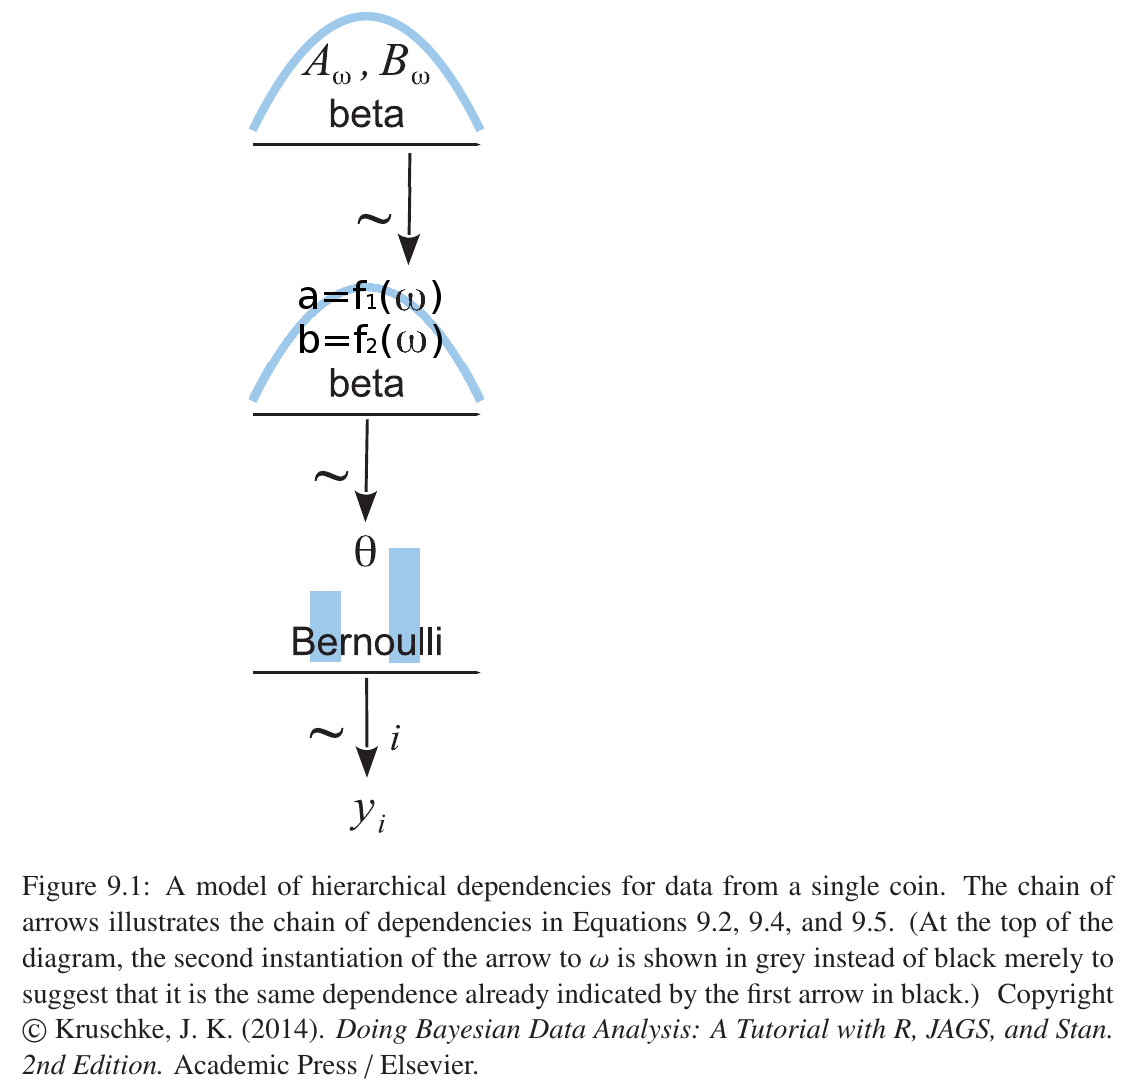

In [2]:
'''Kruschke2nd_Hierarchical_Fig9p1_simplified'''

#### Gemeinsamer Parameterraum "*joint parameter space*"

- $D = \{y_i\}$: Daten Versuchsergebnis
- $\theta$: Parameter für Verteilung der Daten
    - $\theta_j$ für verschiedene Münzen
- $\omega$: Parameter für Verteilung der $\theta_j$

- Gemeinsame (Verbund-, *joint*) Verteilung $p(\theta,\omega,D)$

- Posterior

$$\begin{aligned}
p(\theta,\omega\,|\,D) &= \frac{p(D|\theta,\omega)\,p(\theta,\omega)}{p(D)} \\
&= \frac{p(D|\theta)\,p(\theta|\omega)\,p(\omega)}{p(D)}
\end{aligned}$$

- faktorisiert

## Beispiel Münze aus Münzprägeanstalt

#### Likelihood

$$y_i \sim \mathrm{Bernoulli}(\theta)$$

#### Prior für $\theta$

$$\theta \sim \mathrm{beta}(a,b)$$

Hängt ab von Parametrisierung a, b
- anstatt a und b können auch
- *Erwartungswert* $\mu$ und *Standardabweichung* $\sigma$ oder
- *Modus* $\omega=\frac{a-1}{a+b-2}$ und *Konzentration* $\kappa=a+b$ gewählt werden:
$$\theta \sim \mathrm{beta}\bigl( \omega(\kappa-2)+1,\, (1-\omega)(\kappa-2)+1 \bigr)$$

#### Prior für $\omega$

$$p(\omega) = \mathrm{beta}(\omega|A_{\omega}, B_{\omega})$$
mit Konstanten $A_{\omega}$ und $B_{\omega}$ mit Modus $\frac{A_{\omega}-1}{A_{\omega}+B_{\omega}-2}$

#### (Prior für $\kappa$)

$$\kappa = 100$$

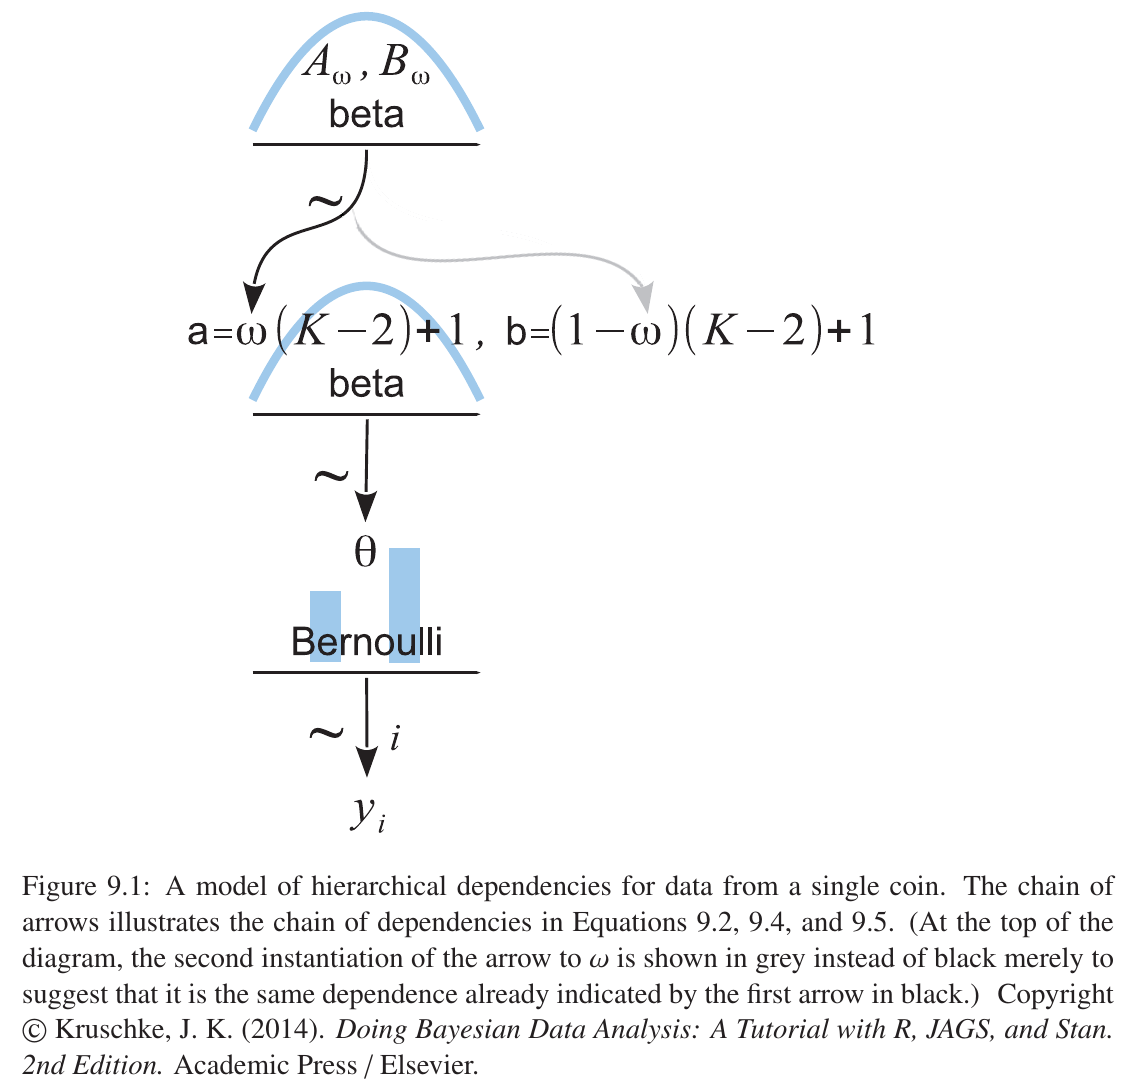

In [2]:
'''Kruschke2nd_Hierarchical_Fig9p1.png'''

#### Posterior für $\omega$ und $\theta$

$$\begin{aligned}
p(\theta,\omega\,|\,D) &= \frac{p(D|\theta,\omega)\,p(\theta,\omega)}{p(D)}\qquad&\text{Bayes} \\
&= \frac{p(D|\theta)\,p(\theta|\omega)\,p(\omega)}{p(D)}\qquad&\text{Hierarchie}
\end{aligned}$$

# Lösung

### *Nicht* mathematisch geschlossen lösbar

### Numerisch per Gitter-Näherung


## 1. Beispiel: schwache Abhängigkeit

- Sei $\omega$ unbekannt, etwas eingeschränkt um 0.5
- Sei $\theta$ nur schwach von $\omega$ abhängig 
    - aber breit verteilt

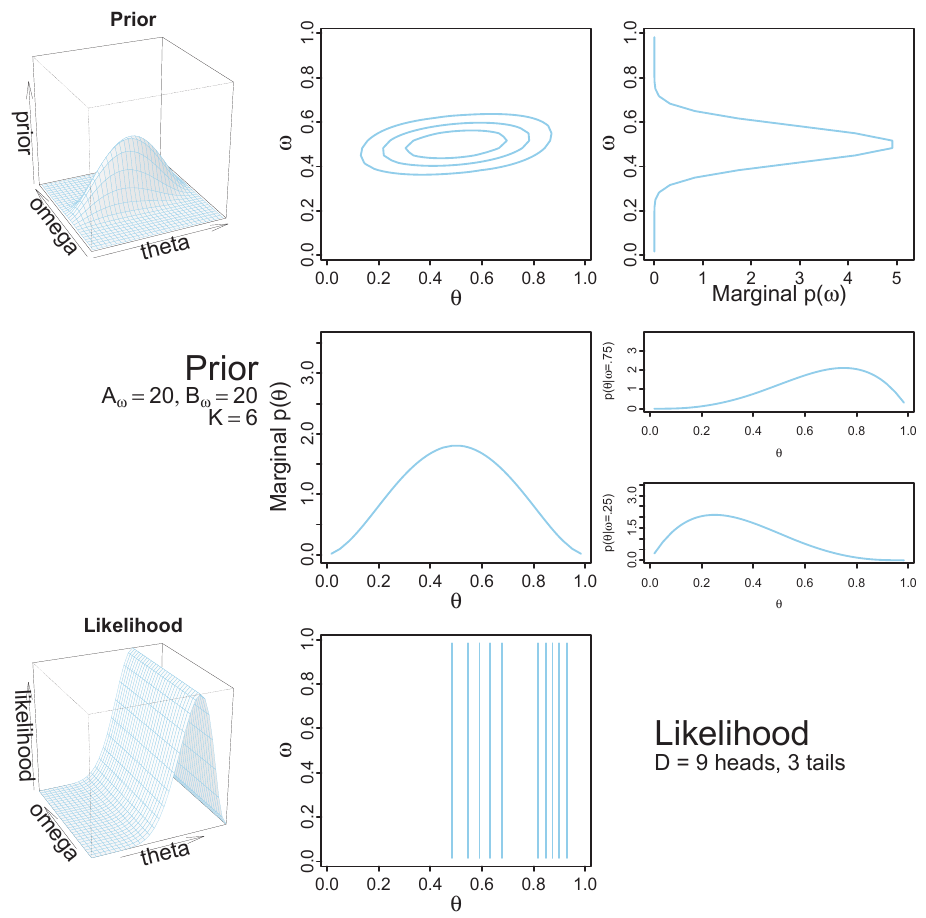

In [6]:
'''Kruschke2nd_Hierarchical_Fig9p3'''

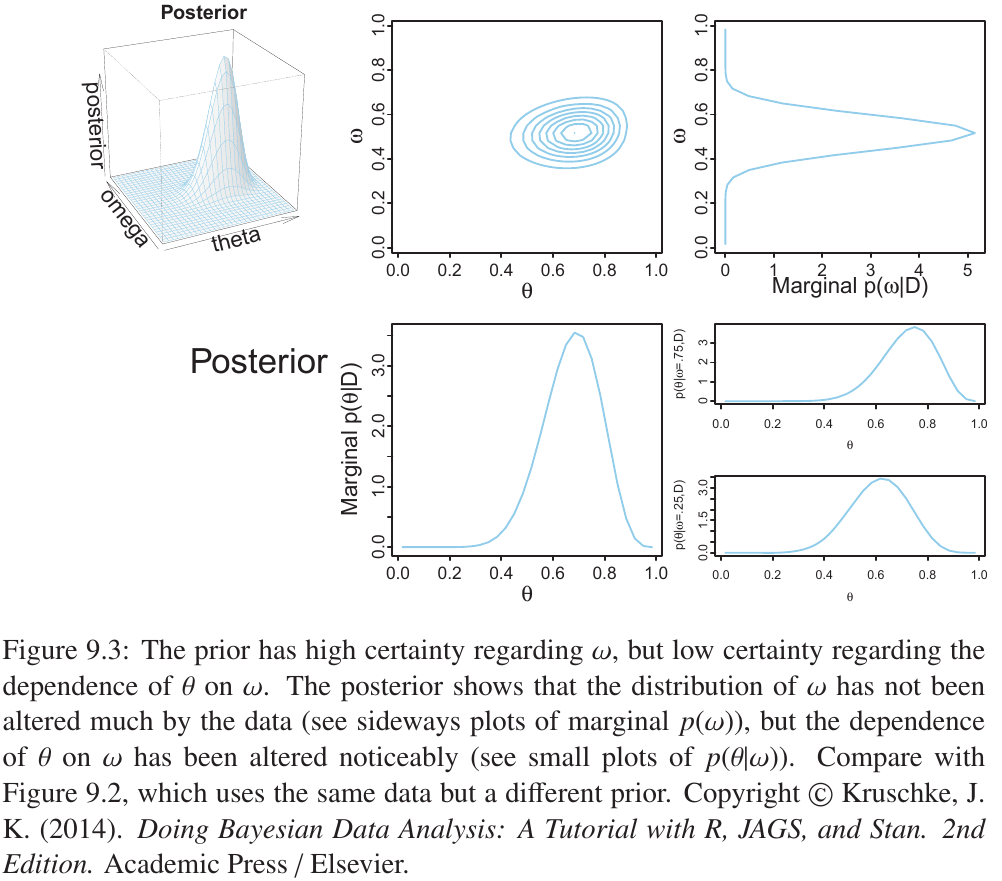

## 2. Beispiel: starke Abhängigkeit

- Sei $\omega$ unbekannt, breit verteilt.
- Sei $\theta$ stark von $\omega$ abhängig 
    - Münzen einer Prägemethode untereinander ziemlich ähnlich
    - Münzen unterschiedlicher Prägemethode unterscheiden sich

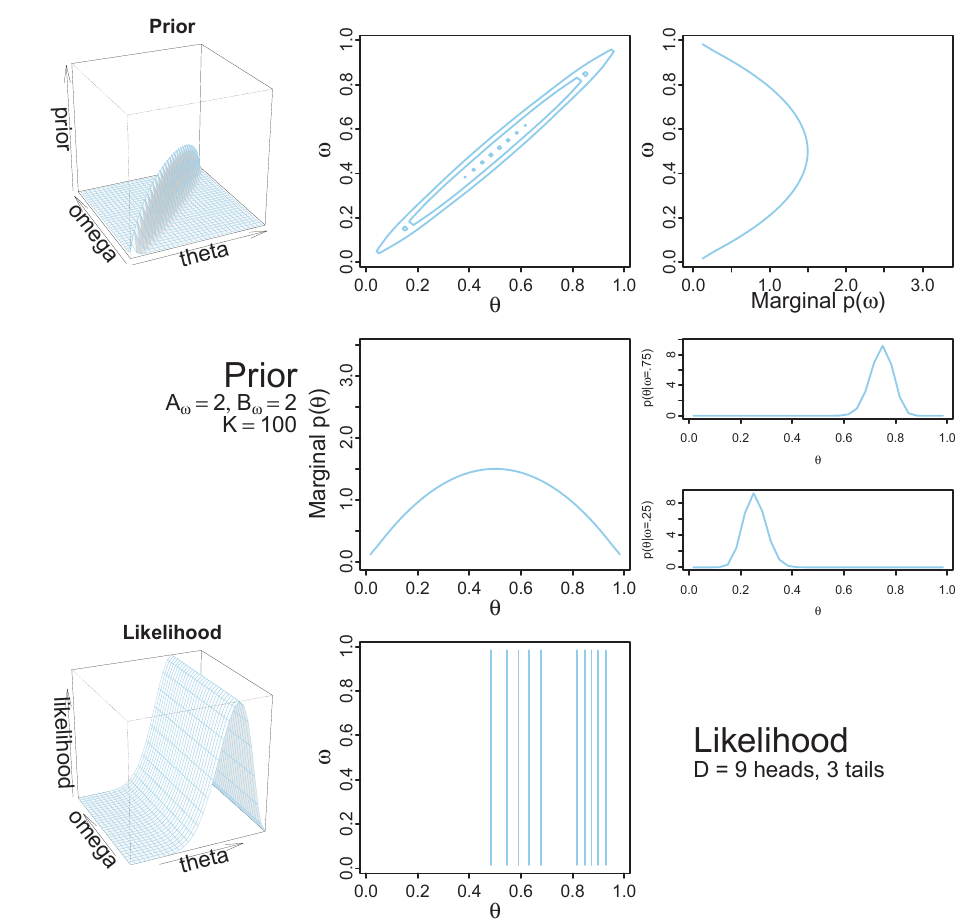

In [4]:
'''Kruschke2nd_Hierarchical_Fig9p2'''

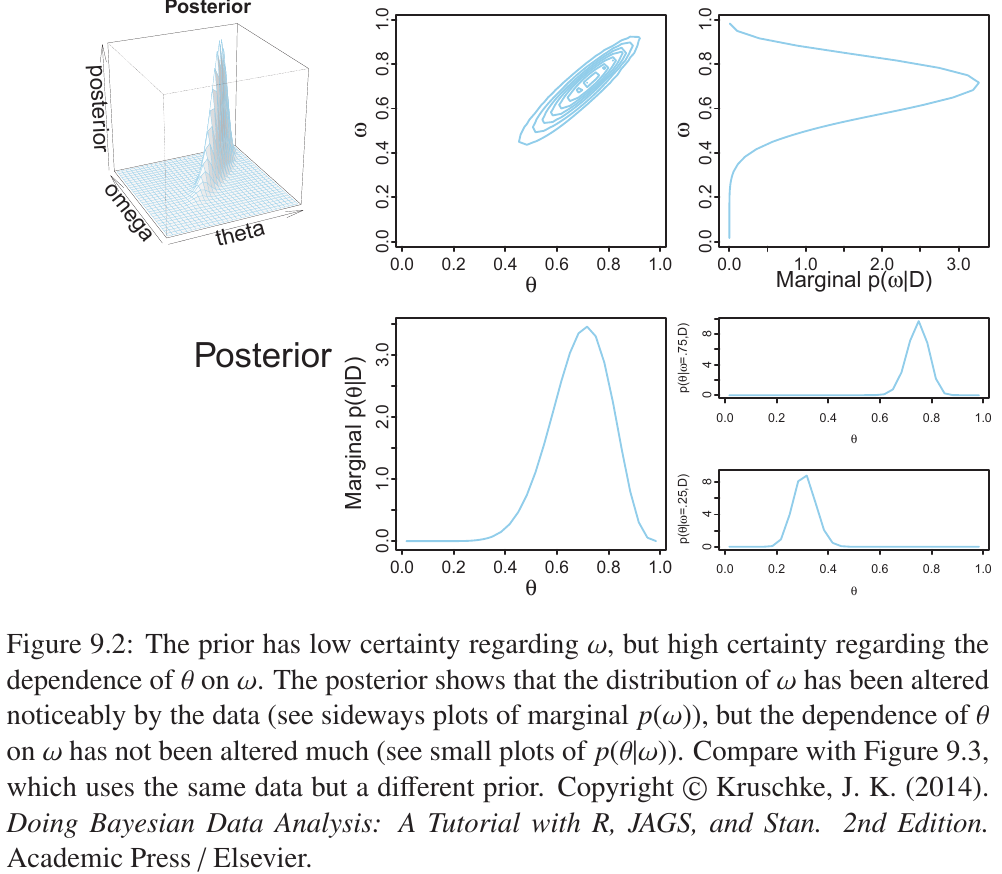

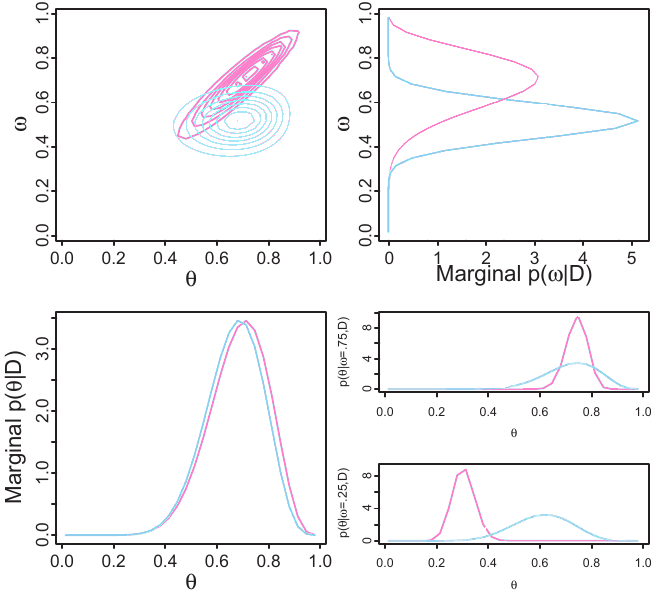

In [10]:
'''compare Fig9.2 and .3'''

#### Ausgangssituation

- Gleiche Daten, gleiche Likelihood
- Prior <span style="color:red">stark gekoppelt</span> / <span style="color:blue">schwach gekoppel</span>
    - Randverteilung <span style="color:red">breiter</span> / <span style="color:blue">schmaler</span>
    - Bedingte Wahrscheinlichkeitsverteilung <span style="color:red">unterschiedlich, schmal</span> / <span style="color:blue">ähnlich, breit</span>

#### Gemeinsamkeiten

- breite Prior-Randverteilung über $\theta$ $\;\Rightarrow\;$ Posterior-Randverteilung über $\theta$ ähnlich
- orientiert sich an Daten, Likelihood

#### Unterschiede

- Bedingte Posterior Verteilung $p(\theta|\omega)$ :
    - paßt sich an <span style="color:blue">Likelihood</span> an
    - wird vom <span style="color:red">Prior</span> bestimmt
- Posterior Randverteilung $p(\omega)$ <span style="color:red">deutlich</span> / <span style="color:blue">kaum</span> beeinflußt
    - obwohl Posterior im gekoppelten Fall breiter bleibt


### Ergebnis

Bei starker Abhängigkeit ist mit Hilfe der Daten eine (indirekte) Aussage über die Prägemaschine ($\omega$) möglich.

# Hierarchisches Modell am Beispiel zweier Münzen aus einer Prägeanstalt

- Zusätzliche Dimension: mehrere $\theta_s$
- Unterschiedliche Daten: Likelihoods
- Mehrere Posteriors für $\theta_s$
- einen gemeinsamen Posterior für $\omega$

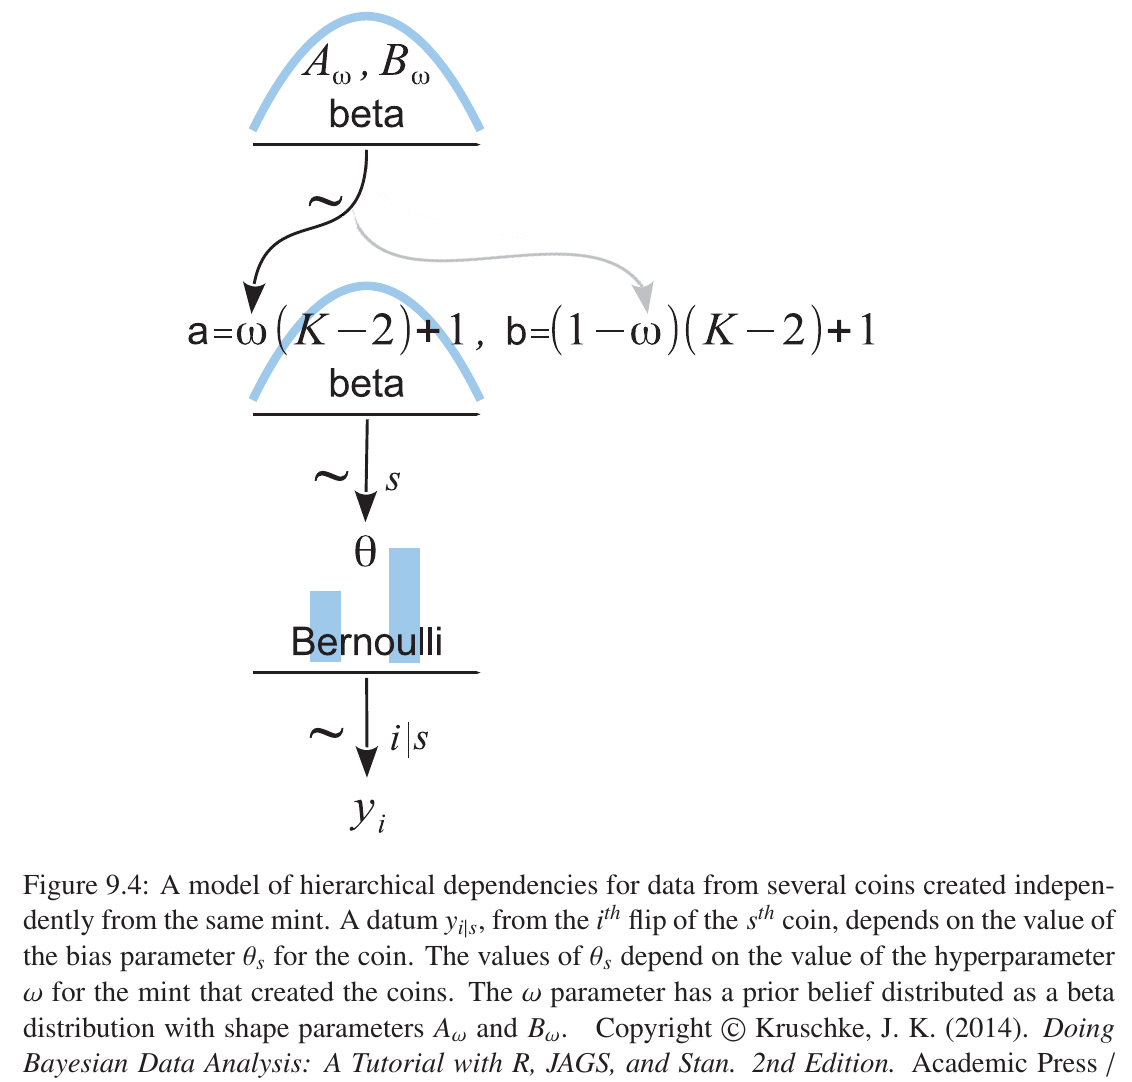

In [11]:
'''Kruschke2nd_Hierarchical_Fig9p4'''

## 3. Beispiel: schwache Kopplung

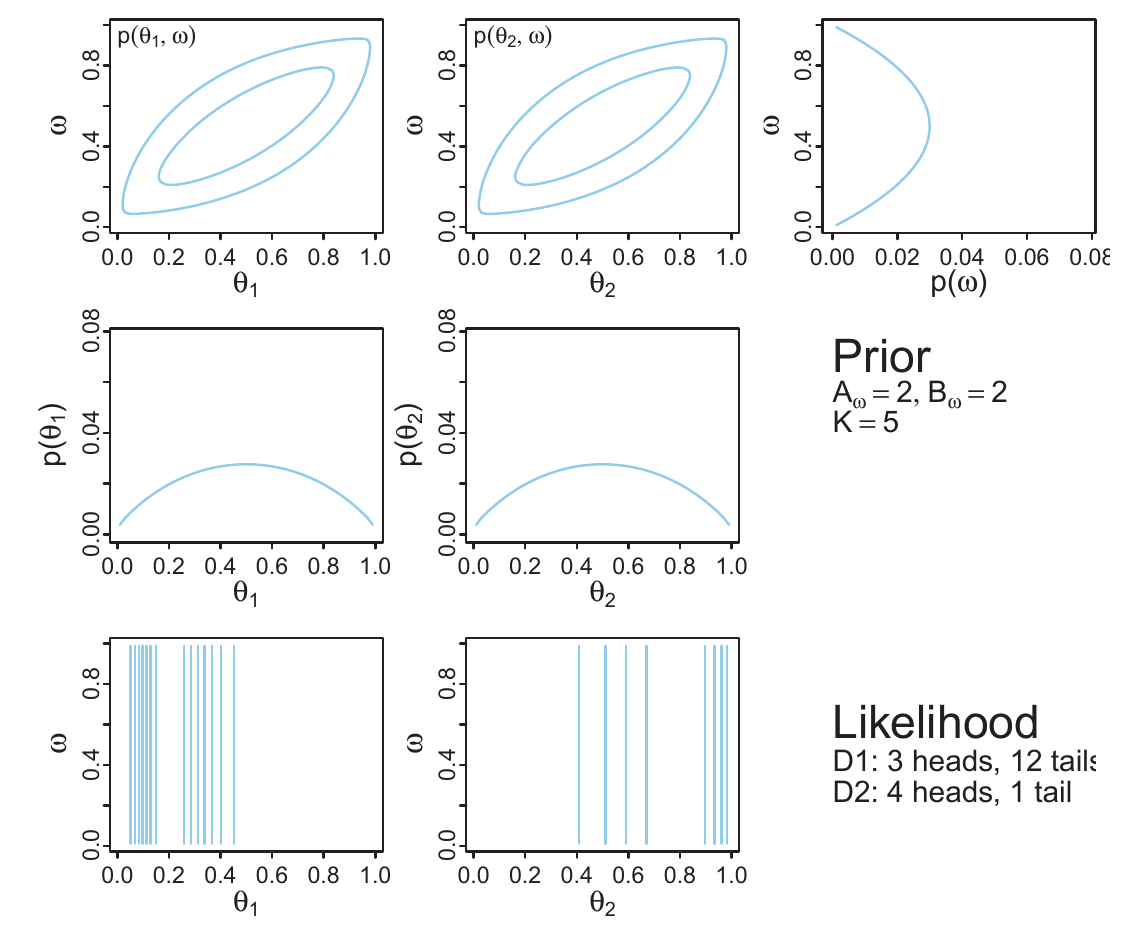

In [12]:
'''Kruschke2nd_Hierarchical_Fig9p5'''

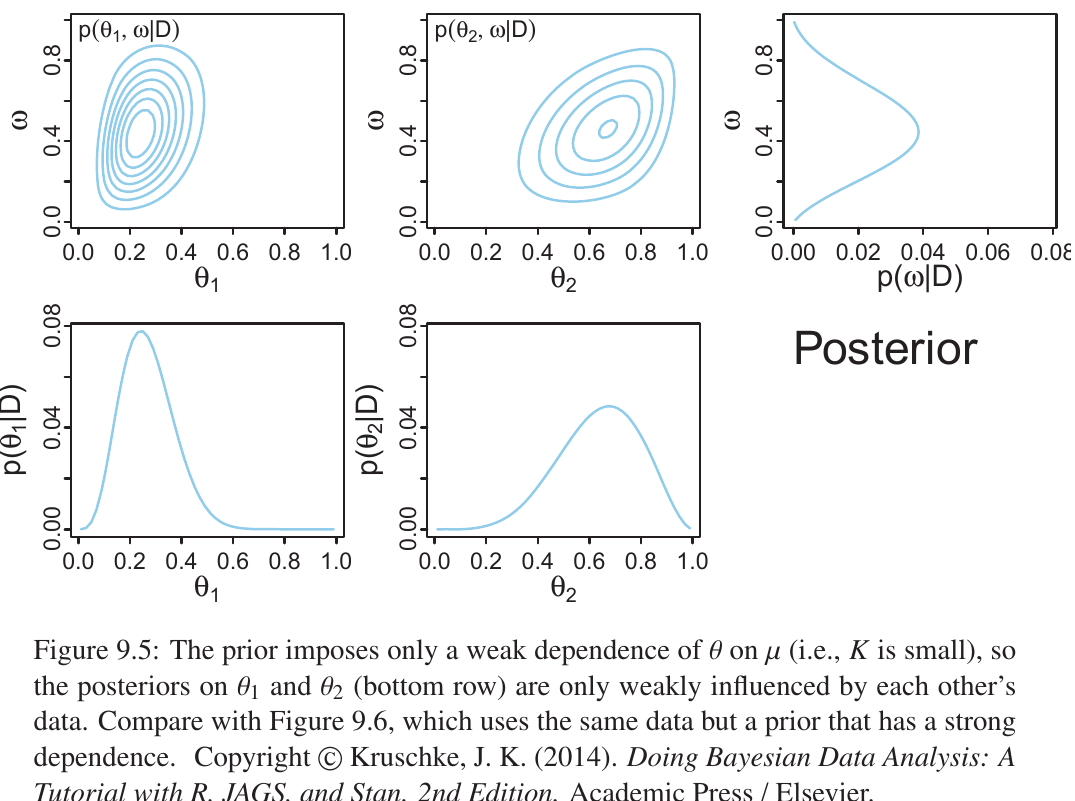

## 4. Beispiel: starke Kopplung

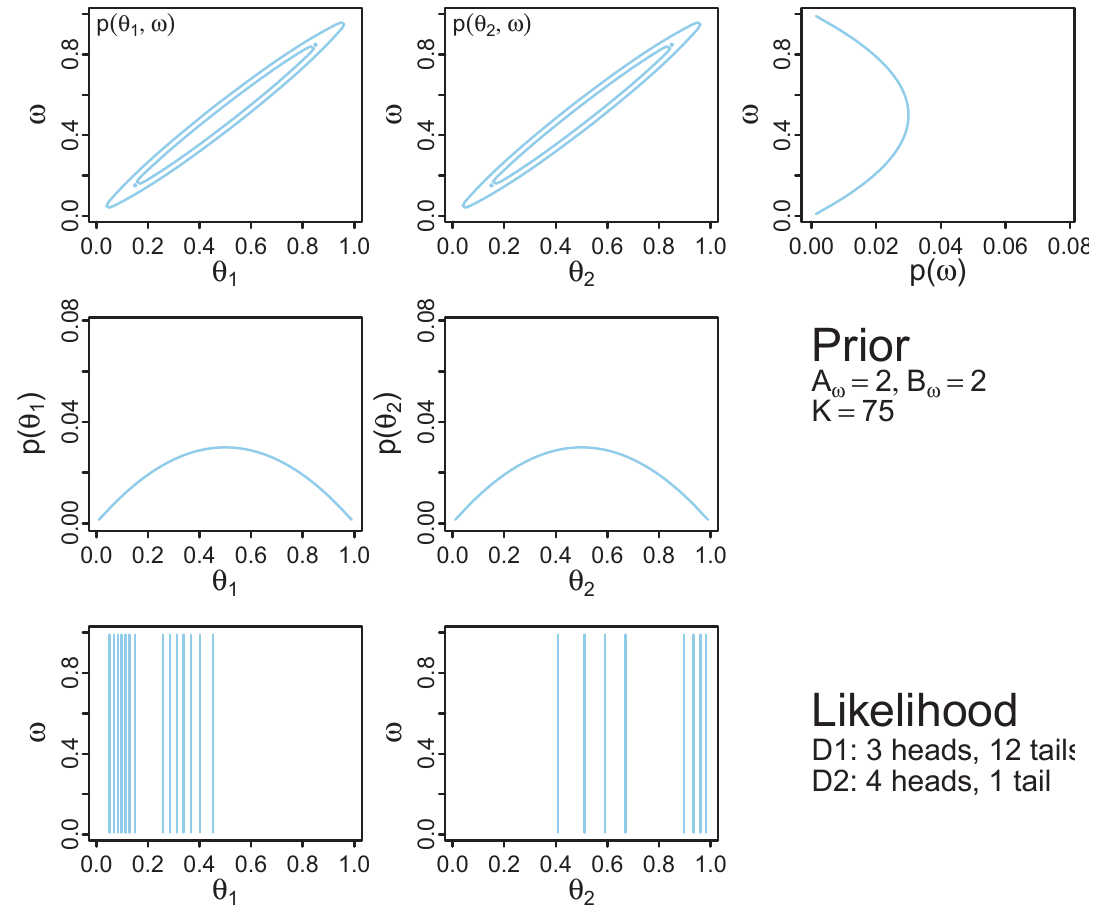

In [14]:
'''Kruschke2nd_Hierarchical_Fig9p6'''

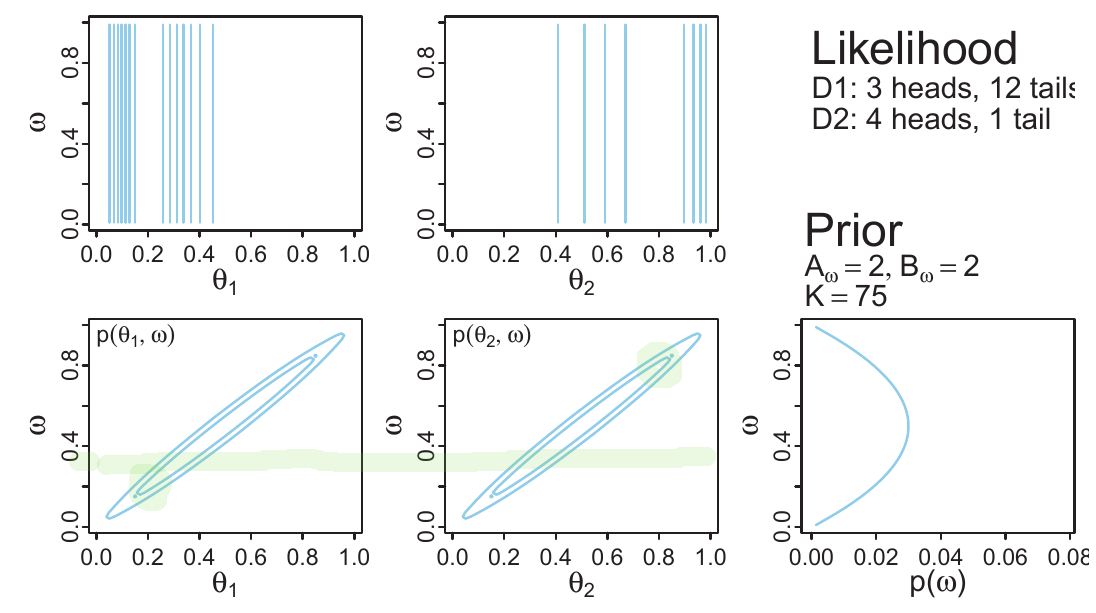

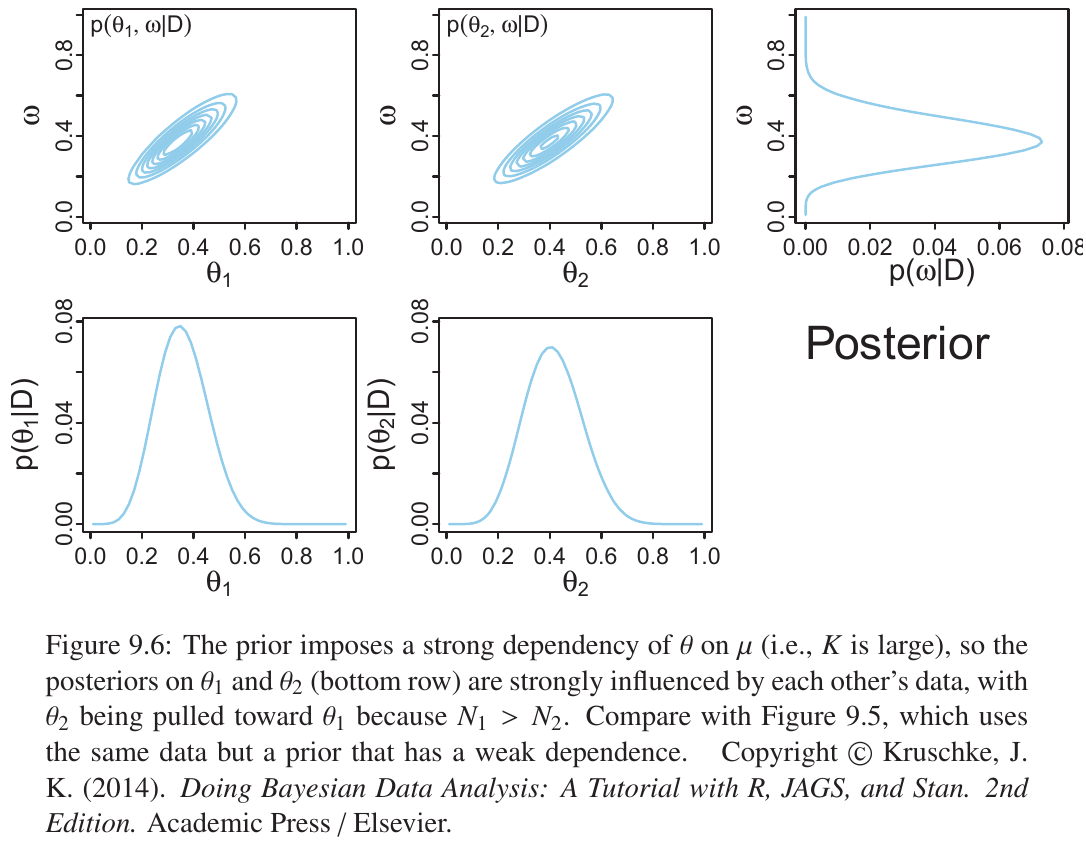

### Ergebnis Kopplung

"Konzentrations"-Parameter $\kappa$ der Beta-Verteilung (äquivalent Anzahl der Daten im Vorwissen)
$$\kappa = a+b$$

- erzwingt gemeinsame Betrachtung der Datensätze

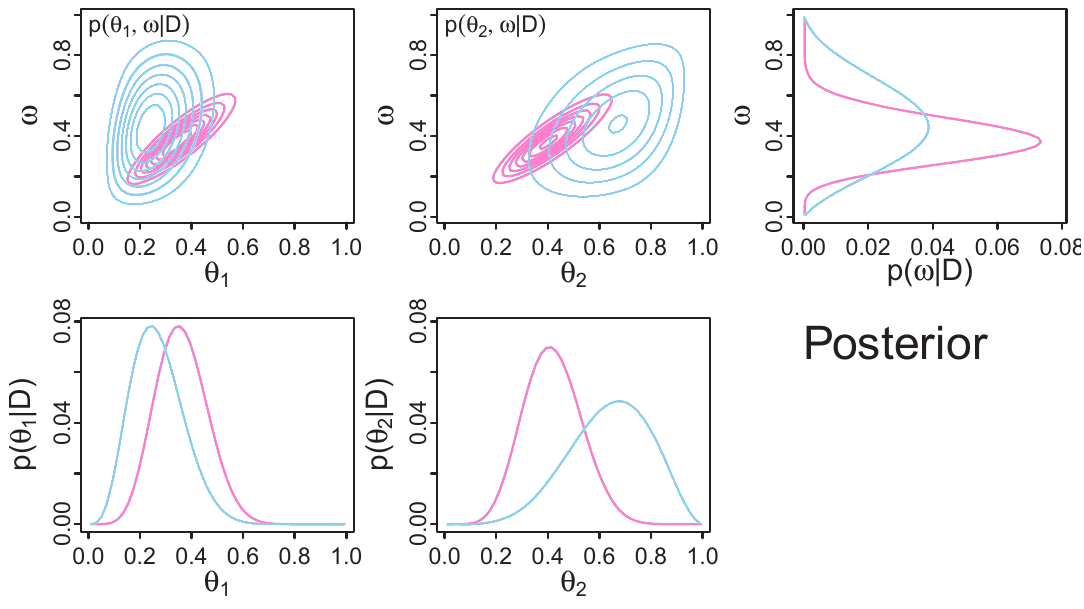

In [17]:
'''compare Fig9.5 and .6'''

#### Ergebnis

- Kopplung erzwingt gemeinsame Posterior-Verteilung 
- Kopplung erlaubt Aussage über obere Hierarchie-Ebene $\omega$

# Zusammenfassung Abhängigkeit und Kopplung

#### Hierarchische Modelle

- übergeordnete Parameter
- ohne *direkten* Einfluß auf die gemessene Zufallsvariable

#### Abhängigkeit

- Abhängigkeit zwischen Parametern unterschiedlicher Hierarchie-Ebenen
    - erlaubt Rückschlüsse auf sonst unzugänglichen Parameter der oberen Ebene

#### Kopplung

- Mehrere Parameter aus derselben unteren Hierarchie-Ebene können über die übergeordnete Ebene gekoppelt sein
- erlaubt Rückschlüsse 
    - Posterior untere Stufe $p(\theta_i)$ beeinflußt durch <span style="color:blue">Likelihood</span> / <span style="color:red">Kopplung</span>
    - Posterior obere Stufe $p(\omega)$ 
    - Abhängigkeit

#### Ausblick

- Kopplungsparameter bestimmen

# Fragen?

# Berechnung

### Problem mit Numerik: Näherungsrechnung mit Gitter

- Graphiken entstanden mit 50 Stützstellen je Parameter.
- Drei Parameter benötigen 50^3=125.000 Berechnungen
- Vier Parameter schon 6 Mio; fünf Parameter gehen mit 312 Mio schon nicht mehr zu berechnen...
    - daher andere Methode: random walk *Markov Chain Monte Carlo*

In [3]:
'''use built in pocket calculator'''
print(50**3, 50**4, 50**5, 50**6)

125000 6250000 312500000 15625000000


# *Markov Chain Monte Carlo* Methode

mit *Pystan*

## 2. Beispiel: Eine Münze aus der Prägeanstalt, starke Abhängigkeit 

In [4]:
model2 = """
    data {
      int<lower=0> N;              // number of tosses
      int<lower=0,upper=1> y[N];   // heads=1 or tails
    }
    parameters {
      real<lower=0, upper=1> omega;// top level parameter for beta prior of theta
      real<lower=0, upper=1> theta;// lower level parameter
    }
    transformed parameters {
      real a;                      // for beta-prior of theta
      real b;
      real kappa;                  // for beta prior of theta 
      kappa = 100;                 // strong dependency of theta from omega
      a = omega * (kappa - 2) + 1; // translate omega/kappa to a and b of beta
      b = (1 - omega) * (kappa - 2) + 1;
    }

    model {
      omega ~ beta(2, 2);          // (fixed) prior for omega, influences a and b
      theta ~ beta(a, b);          // prior for theta, depending on omega
      y ~ bernoulli(theta);        // data model, depends *only* on theta
    }
"""

In [5]:
y = np.array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1])# data: 9 heads, 3 tails
data = {'y': y, 
        'N': len(y)}              # ... serves as data dictionary for stan
fit = pystan.stan(model_code=model2, data=data, iter=10000, 
                  warmup=500, chains=4, n_jobs=4, model_name='example2')
print(fit)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL example2_c96a6b3465cf652e1eb02f79419f5c2d NOW.


Inference for Stan model: example2_c96a6b3465cf652e1eb02f79419f5c2d.
4 chains, each with iter=10000; warmup=500; thin=1; 
post-warmup draws per chain=9500, total post-warmup draws=38000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
omega   0.69  1.3e-3   0.12   0.44   0.61   0.69   0.77   0.89   7849    1.0
theta   0.69  1.3e-3   0.11   0.45   0.62    0.7   0.77   0.88   8080    1.0
a      68.23    0.13  11.65  43.68  60.54  69.07  76.78  88.35   7849    1.0
b      31.77    0.13  11.65  11.65  23.22  30.93  39.46  56.32   7849    1.0
kappa  100.0     0.0    0.0  100.0  100.0  100.0  100.0  100.0  38000    nan
lp__   -10.4    0.01   1.11 -13.43  -10.8 -10.06  -9.62  -9.34   8327    1.0

Samples were drawn using NUTS at Thu Feb 15 12:34:07 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


     Elapsed Time: 0.04 seconds (Warm-up)
                   0.61 seconds (Sampling)
                   0.65 seconds (Total)


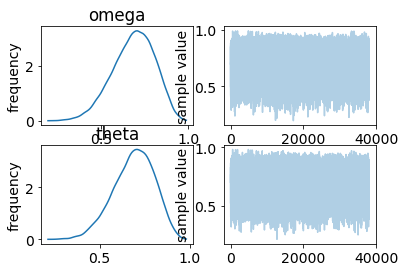

In [6]:
myplot = fit.traceplot(
    ['omega', 'theta']) # 'kappa' would have a "singular matrix";
                        # a and b are of minor interest

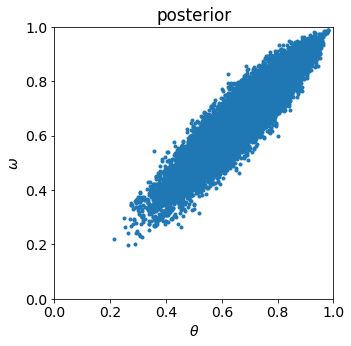

In [7]:
posterior_o = np.asarray(fit.extract('omega')['omega'])
posterior_t = np.asarray(fit.extract('theta')['theta'])
fig = plt.figure(figsize=(5, 5))
plt.scatter(posterior_t, posterior_o, marker='.')
plt.ylabel(r'$\omega$')
plt.xlabel(r'$\theta$')
plt.xlim(0., 1.)
plt.ylim(0., 1.)
plt.title('posterior');

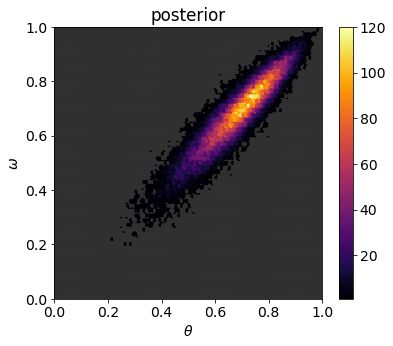

In [8]:
from matplotlib import cm
mycmap = plt.get_cmap('inferno')  # select heat-map
mycmap.set_under('#303030')       # color for values less than vmin

fig = plt.figure(figsize=(6, 5))  # extend for bar to the right
plt.hexbin(posterior_t, posterior_o,
           extent=[0., 1., 0., 1.], vmin=1, vmax=120, cmap=mycmap)
plt.ylabel(r'$\omega$')
plt.xlabel(r'$\theta$')
plt.xlim(0., 1.)
plt.ylim(0., 1.)
plt.colorbar()
plt.title('posterior');

#### Ergebnis:

... von oben bestätigt.

## Trick:  Überprüfen des Priors

Analyse **ohne** Daten

#### sinnvoll zur Überprüfung abhängiger Priors

- Zwischenebenen in Hierarchie
- abgeleitete Parameter
- Differenzen 

In [9]:
model2prior = """
    data {
      int<lower=0> N;              // number of tosses
      int<lower=0,upper=1> y[N];   // heads=1 or tails
    }
    parameters {
      real<lower=0, upper=1> omega;// top level parameter for beta prior of theta
      real<lower=0, upper=1> theta;// lower level parameter
    }
    transformed parameters {
      real a;                      // for beta-prior of theta (directly)
      real b;
      real kappa;                  // for beta prior of theta (indirectly)
      kappa = 100;                 // strong dependency of theta from omega
      a = omega * (kappa - 2) + 1; // translate omega/kappa to a and b of beta
      b = (1 - omega) * (kappa - 2) + 1;
    }

    model {
      omega ~ beta(2, 2);          // (fixed) prior for omega, influences a and b
      theta ~ beta(a, b);          // prior for theta, depending on omega
//      y ~ bernoulli(theta);      // NO data => Prior only
    }
"""

In [10]:
y = np.array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1]) # data: 9 heads, 3 tails
data = {'y': y, 'N': len(y)}                      # ... serves as dict for stan
fitprior = pystan.stan(model_code=model2prior, data=data, model_name='prior1',
                       iter=1000, warmup=100, chains=4)
print(fitprior)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL prior1_cacb40c78469d44773d8451c4835470e NOW.


Inference for Stan model: prior1_cacb40c78469d44773d8451c4835470e.
4 chains, each with iter=1000; warmup=100; thin=1; 
post-warmup draws per chain=900, total post-warmup draws=3600.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
omega   0.51  8.8e-3   0.23    0.1   0.32   0.51   0.68   0.91    660    1.0
theta   0.51  9.1e-3   0.23   0.09   0.33   0.51   0.68   0.91    624    1.0
a      50.52    0.86  22.15  10.32  32.64  50.99  67.91  90.28    660    1.0
b      49.48    0.86  22.15   9.72  32.09  49.01  67.36  89.68    660    1.0
kappa  100.0     0.0    0.0  100.0  100.0  100.0  100.0  100.0   3600    nan
lp__   -3.33    0.04   1.21   -6.5  -3.84  -2.96  -2.44  -2.11    763   1.01

Samples were drawn using NUTS at Thu Feb 15 12:39:46 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


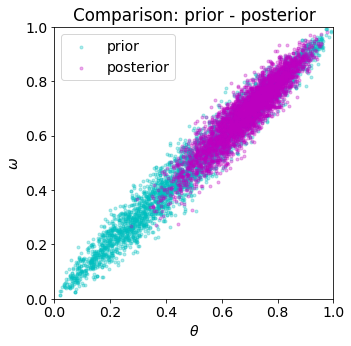

In [11]:
'''compare prior - posterior'''
prior_o = np.asarray(fitprior.extract('omega')['omega'])
prior_t = np.asarray(fitprior.extract('theta')['theta'])
fig = plt.figure(figsize=(5, 5))
plt.scatter(prior_t, prior_o, marker='.', color='c', alpha=.3, label='prior')
plt.scatter(posterior_t[::10], posterior_o[::10],
            marker='.', color='m', alpha=.3, label='posterior') # thinned
plt.ylabel(r'$\omega$')
plt.xlabel(r'$\theta$')
plt.xlim(0., 1.)
plt.ylim(0., 1.)
plt.title('Comparison: prior - posterior')
plt.legend(loc='upper left');

## Ergebnis

Modell mit enger Bindung von $\theta$ an $\omega$ reproduziert

- Prior, obwohl breite Randverteilungen, beschreibt Abhängigkeit
- Posterior für $\theta$ von Daten (Likelihood) verschoben
- Posterior für $\omega$ durch Kopplung verschoben

## Beispiel 3) *Zwei Münzen aus einer Prägestätte mit schwacher Kopplung*

In [12]:
model3 = """
    data {
      int<lower=0> N1;              // number of tosses
      int<lower=0> N2;              // number of tosses
      int<lower=0,upper=1> y1[N1];  // heads=1 or tails
      int<lower=0,upper=1> y2[N2];  // heads=1 or tails
    }
    parameters {
      real<lower=0, upper=1> omega;
      real<lower=0, upper=1> theta1;
      real<lower=0, upper=1> theta2;
    }
    transformed parameters {
      real a;
      real b;
      real kappa;
      kappa = 5;                     // weak coupling
      a = omega * (kappa - 2) + 1;
      b = (1 - omega) * (kappa - 2) + 1;
    }

    model {
      omega ~ beta(2, 2);            // Prior for omega, influences a and b
      theta1 ~ beta(a, b);           // Prior for theta1, depending on omega
      theta2 ~ beta(a, b);           // Prior for theta2, depending on omega
      y1 ~ bernoulli(theta1);
      y2 ~ bernoulli(theta2);
    }
"""


In [13]:
                               # data1: 3 heads, 12 tails
y1 = np.array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])
y2 = np.array([1, 0, 1, 1, 1]) # data2: 4 heads,  1 tail
                               # ... serves as dict for stan
datatwo = {'y1': y1, 'y2': y2, 'N1': len(y1), 'N2': len(y2)}
fit3 = pystan.stan(model_code=model3, data=datatwo,
                   iter=10000, model_name='model3',
                   warmup=500, chains=4, n_jobs=4)
print(fit3)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL model3_d3d7751021aef032176b1bdae7e4d1f0 NOW.


Inference for Stan model: model3_d3d7751021aef032176b1bdae7e4d1f0.
4 chains, each with iter=10000; warmup=500; thin=1; 
post-warmup draws per chain=9500, total post-warmup draws=38000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
omega    0.47  1.2e-3   0.19   0.12   0.33   0.46    0.6   0.84  26351    1.0
theta1   0.27  5.9e-4    0.1    0.1    0.2   0.26   0.34   0.49  29649    1.0
theta2   0.64  9.6e-4   0.15   0.32   0.54   0.65   0.76    0.9  25651    1.0
a         2.4  3.5e-3   0.57   1.37   1.98   2.38    2.8   3.51  26351    1.0
b         2.6  3.5e-3   0.57   1.49    2.2   2.62   3.02   3.63  26351    1.0
kappa     5.0     0.0    0.0    5.0    5.0    5.0    5.0    5.0  38000    nan
lp__   -17.41    0.01   1.33 -20.83 -18.02 -17.07 -16.44 -15.89  16533    1.0

Samples were drawn using NUTS at Thu Feb 15 12:41:23 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split c

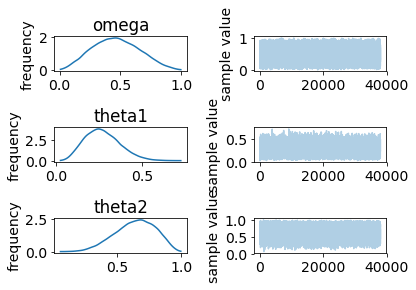

In [15]:
myplot = fit3.traceplot(['omega', 'theta1', 'theta2'])
plt.tight_layout();

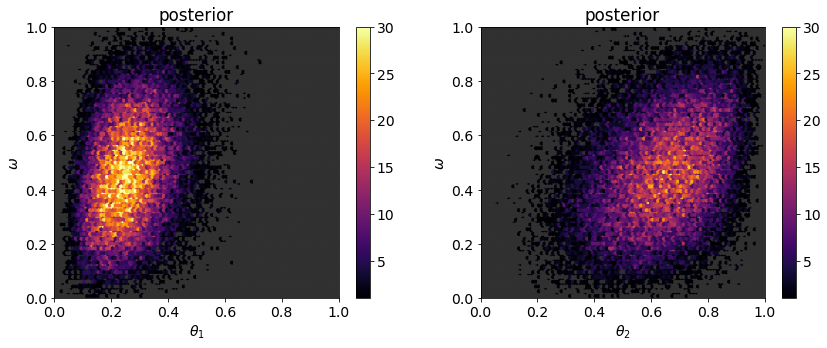

In [16]:
'''joint posteriors for weakly coupled prior'''
post3_o  = np.asarray(fit3.extract('omega')['omega'])
post3_t1 = np.asarray(fit3.extract('theta1')['theta1'])
post3_t2 = np.asarray(fit3.extract('theta2')['theta2'])
fig = plt.figure(figsize=(14, 5))
fig.add_subplot(1, 2, 1)
mycmap.set_under('#303030') # color for values less than vmin
plt.hexbin(post3_t1, post3_o, extent=[0., 1., 0., 1.],
           vmin=1, vmax=30, cmap=mycmap)
plt.ylabel(r'$\omega$')
plt.xlabel(r'$\theta_1$')
plt.xlim(0., 1.)
plt.ylim(0., 1.)
plt.colorbar()
plt.title('posterior')
fig.add_subplot(1, 2, 2)
plt.hexbin(post3_t2, post3_o, extent=[0., 1., 0., 1.],
           vmin=1, vmax=30, cmap=mycmap)
plt.ylabel(r'$\omega$')
plt.xlabel(r'$\theta_2$')
plt.xlim(0., 1.)
plt.ylim(0., 1.)
plt.colorbar()
plt.title('posterior');

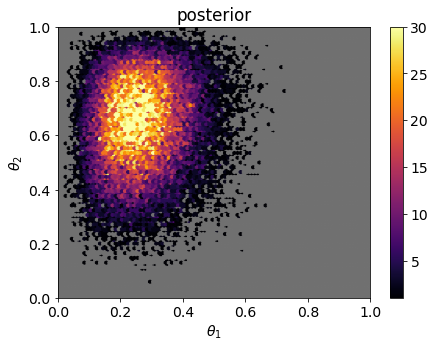

In [17]:
'''dependency of thetas - under weak prior'''
fig = plt.figure(figsize=(7, 5))
mycmap.set_under('#707070')          # color for values less than vmin
plt.hexbin(post3_t1, post3_t2, extent=[0., 1., 0., 1.],
           vmin=1, vmax=30, cmap=mycmap)
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.xlim(0., 1.)
plt.ylim(0., 1.)
plt.colorbar()
plt.title('posterior');

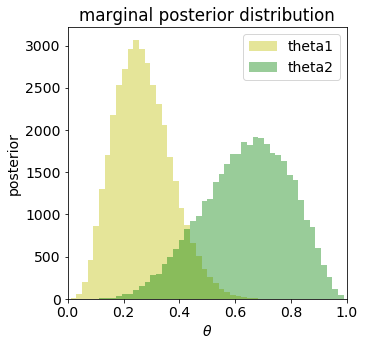

In [18]:
'''Marginal posteriors of theta1 and theta2'''
fig = plt.figure(figsize=(5, 5))
bins = np.linspace(-0.01, 1.01, 50+1)
plt.hist(post3_t1, bins=bins, alpha=.4, label='theta1', color='y')
plt.hist(post3_t2, bins=bins, alpha=.4, label='theta2', color='g')
plt.xlabel(r'$\theta$')
plt.ylabel('posterior')
plt.title('marginal posterior distribution')
plt.xlim(0., 1.)
plt.legend(loc='upper right');

#### siehe [ÜA]

## Beispiel 4) starke Kopplung

In [20]:
model4 = """
    data {
      int<lower=0> N1;              // number of tosses
      int<lower=0> N2;              // number of tosses
      int<lower=0,upper=1> y1[N1];  // heads=1 or tails
      int<lower=0,upper=1> y2[N2];  // heads=1 or tails
    }
    parameters {
      real<lower=0, upper=1> omega;
      real<lower=0, upper=1> theta1;
      real<lower=0, upper=1> theta2;
    }
    transformed parameters {
      real a;
      real b;
      real kappa;
      kappa = 75;                    // strong coupling
      a = omega * (kappa - 2) + 1;
      b = (1 - omega) * (kappa - 2) + 1;
    }

    model {
      omega ~ beta(2, 2);            // Prior for omega, influences a and b
      theta1 ~ beta(a, b);           // Prior for theta1, depending on omega
      theta2 ~ beta(a, b);           // Prior for theta2, depending on omega
      y1 ~ bernoulli(theta1);
      y2 ~ bernoulli(theta2);
    }
"""


In [21]:
# same 2D data as before
fit4 = pystan.stan(model_code=model4, data=datatwo, model_name='model4', 
                   iter=10000, warmup=500, chains=4, n_jobs=4)
print(fit4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL model4_7f37498b8f3ba0b1012a3296b3714558 NOW.


Inference for Stan model: model4_7f37498b8f3ba0b1012a3296b3714558.
4 chains, each with iter=10000; warmup=500; thin=1; 
post-warmup draws per chain=9500, total post-warmup draws=38000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
omega    0.39  1.1e-3   0.11   0.19   0.31   0.38   0.46    0.6   9244    1.0
theta1   0.36  1.0e-3    0.1   0.18   0.29   0.35   0.42   0.56   9635    1.0
theta2   0.42  1.1e-3   0.11   0.21   0.34   0.41   0.49   0.64   9593    1.0
a       29.23    0.08   7.67  15.13  23.77   29.0  34.32  44.95   9244    1.0
b       45.77    0.08   7.67  30.05  40.68   46.0  51.23  59.87   9244    1.0
kappa    75.0     0.0    0.0   75.0   75.0   75.0   75.0   75.0  38000    nan
lp__    -16.1    0.01   1.27 -19.41 -16.67 -15.77 -15.18 -14.66  11318    1.0

Samples were drawn using NUTS at Thu Feb 15 12:46:17 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split c

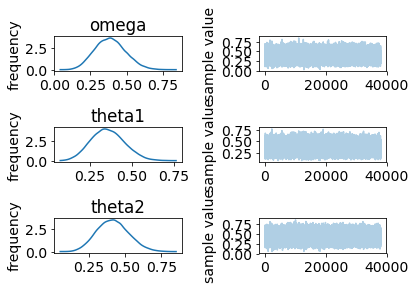

In [22]:
myplot = fit4.traceplot(['omega', 'theta1', 'theta2'])
plt.tight_layout();

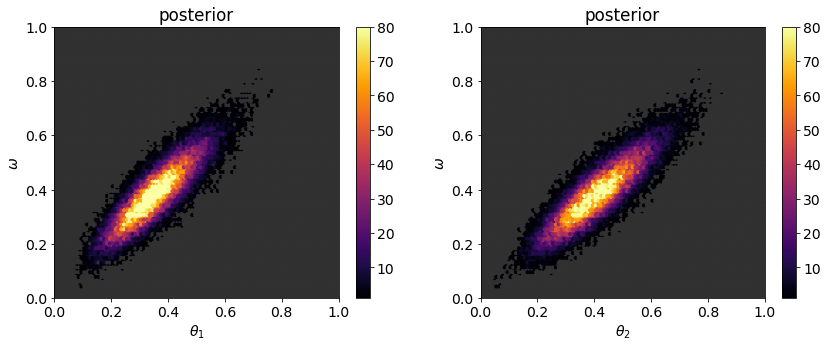

In [23]:
'''strong coupling - joint posterior theta vs. omega'''
post4_o  = np.asarray(fit4.extract('omega')['omega'])
post4_t1 = np.asarray(fit4.extract('theta1')['theta1'])
post4_t2 = np.asarray(fit4.extract('theta2')['theta2'])
fig = plt.figure(figsize=(14, 5))
fig.add_subplot(1, 2, 1)
mycmap.set_under('#303030')    # color for values less than vmin
plt.hexbin(post4_t1, post4_o, extent=[0., 1., 0., 1.],
           vmin=1, vmax=80, cmap=mycmap)
plt.ylabel(r'$\omega$')
plt.xlabel(r'$\theta_1$')
plt.xlim(0., 1.)
plt.ylim(0., 1.)
plt.colorbar()                 # two colour bars for symmetry  
plt.title('posterior')
fig.add_subplot(1, 2, 2)
plt.hexbin(post4_t2, post4_o, extent=[0., 1., 0., 1.],
           vmin=1, vmax=80, cmap=mycmap)
plt.ylabel(r'$\omega$')
plt.xlabel(r'$\theta_2$')
plt.xlim(0., 1.)
plt.ylim(0., 1.)
plt.colorbar()
plt.title('posterior');

In [24]:
import AngStII_Bayes as bayes
    
def plotMeanHDI(h, label='x', color='k'):
    '''plot Mean and HDI of histogram data in current figure
       input:
         h:     histogram with frequency in [0] and bins in [1] as 
         returned by np.histogram or plt.hist
         label: string for label in plot
         color: color of lines, usefull, if several HDIs
       output:  none, but the plot '''
    hdiinfo = bayes.HDIofGrid(h[0])       # calculate HDI
                                          # index of outermost HDI borders
    hdi_idx = (hdiinfo['indices'][0], hdiinfo['indices'][-1]+1)
    hdi_val = [h[1][i] for i in hdi_idx]  # extract values of bins with index
                                          # mean from histogram's bins
    m = np.asarray([h[0]*([h[1][1:]+h[1][:-1]])/2.]).sum()/h[0].sum()
                                          # plot mean as straight line
    plt.plot(2*[m], [0, 1.1*h[0].max()], color+'-',
             label='Mean ({}) = {:.2f}'.format(label, m))
                                          # plot hdi borders as dashed line
    plt.plot(2*[hdi_val[0]], [0, 2.*hdiinfo['height']], color+'--',
             label='HDI ({}) = [{:.2f}, {:.2f}]'.format(
                                         label, hdi_val[0], hdi_val[1]))
                                          # label only once
    plt.plot(2*[hdi_val[1]], [0, 2.*hdiinfo['height']], color+'--')

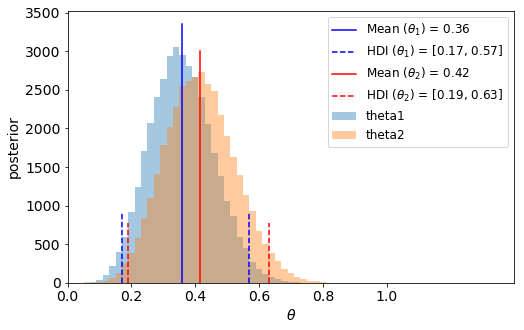

In [25]:
'''Strong coupling - marginal posteriors of theta1 and theta2'''
fig = plt.figure(figsize=(8, 5))
bins = np.linspace(-0.01, 1.01, 51+1)
hist1 = plt.hist(post4_t1, bins=bins, alpha=.4, label='theta1')
hist2 = plt.hist(post4_t2, bins=bins, alpha=.4, label='theta2')
plt.xlabel(r'$\theta$')
plt.ylabel('posterior')
plt.xlim(0., 1.4)
nticks = np.linspace(0.0, 1.0, 6)
aticks = ['{:2.1f}'.format(n) for n in nticks]
plt.xticks(nticks, aticks)
plotMeanHDI(h=hist1, label='$\\theta_1$', color='b')
plotMeanHDI(h=hist2, label='$\\theta_2$', color='r')
plt.legend(loc='upper right', fontsize=12);

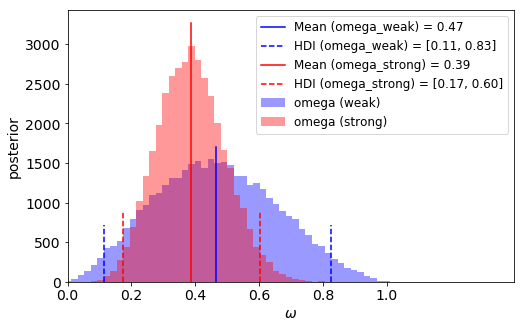

In [26]:
'''compare weak vs. strong coupling - posteriors of omega'''
fig = plt.figure(figsize=(8, 5))
bins = np.linspace(-0.01, 1.01, 50+1)
hist1 = plt.hist(post3_o, color='b', bins=bins, alpha=.4, label='omega (weak)')
hist2 = plt.hist(post4_o, color='r', bins=bins, alpha=.4, label='omega (strong)')
plt.xlabel(r'$\omega$')
plt.ylabel('posterior')
plt.xlim(0., 1.4)
plt.xticks(nticks, aticks)
plotMeanHDI(hist1, 'omega_weak', 'b')
plotMeanHDI(hist2, 'omega_strong', 'r')
plt.legend(loc='upper right', fontsize=12);

# Zusammenfassung Hierarchische Modelle mit MCMC

- Interpretation "folgt aus"
- keine direkte Abhängigkeit der y von *Meta* Parametern $\omega$
- Abhängigkeit $\theta$ von $\omega$ spielt wichtige Rolle für Ergebnis
- einfacher und schneller zu berechnen als vollständig verknüpfte Modellformulierung

# Ausblick

- Hierarchisches Lineares Modell (Kapitel *Bayes-GLM*) 
- Psychophysik (Kapitel Psignifit)

# Literatur

#### Buch 

J. K. Kruschke: "Doing Bayesian Data Analysis, 2nd. A Tutorial with R, JAGS and Stan". Academic Press (2014)
    
#### Bilder

[Bilder aus dem Buch von J. Kruschke](https://sites.google.com/site/doingbayesiandataanalysis/figures)



# Fragen?